In [1]:
import pandas as pd
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import one_hot
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Embedding, LSTM, Dense

In [3]:
df_train = pd.read_csv('../data/lemmatized_answers.csv')[['Body', 'Score']].dropna()

In [4]:
VOCAB_SIZE = 500
encoded_docs = [one_hot(d, VOCAB_SIZE) for d in df_train['Body']]

3
5286


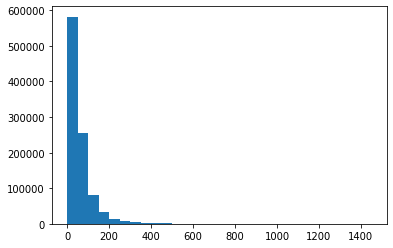

In [5]:
sizes = [len(row) for row in encoded_docs]
print(min(sizes))
print(max(sizes))
plt.hist(sizes, bins=range(0, 1500, 50))
plt.show()

In [6]:
DOC_MAX_SIZE = 150
padded_docs = pad_sequences(encoded_docs, maxlen=DOC_MAX_SIZE, padding='post')

In [7]:
model = Sequential()
model.add(Embedding(VOCAB_SIZE, 100, input_length=DOC_MAX_SIZE))
model.add(LSTM(5))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 100)          50000     
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 2120      
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 52,126
Trainable params: 52,126
Non-trainable params: 0
_________________________________________________________________


In [8]:
print(padded_docs.shape)
print(df_train['Score'].shape)

(985833, 150)
(985833,)


In [ ]:
model.fit(
    x=padded_docs,
    y=df_train['Score'],
    epochs=1
)

 9389/30808 [========>.....................] - ETA: 23:35 - loss: -25.8712 - accuracy: 0.2714  